### Connectome Subtraction with Narrative

1. create a set of narratives - either from the data from some of the papers (the paper by Sam Nastasse on the narratives dataset) or just by picking articles from wikipedia or a newspaper, then for each narrative, 

2. play it into the reservoir, collect the final state, and then 

3. create a confusion matrix *(I think he meant autocorr?)* for the cosine similarity of the different pairs of state vectors. Try this with input to the auditory area, and then taking the state vector sub component related to differnt subnetworks.  do this with the complete connectome, and then connectome minus a subnetwork.
this starts to get at the "sense making" in a simple way.

### 

Conn2Res has 7 Resting State Networks: FP, DMN, VA, DA, VIS, LIM, SM

The issue is that we can't input anything into the auditory area with what we have.

In [8]:
# need to shift the stories by n

# first find how how much to shift
# then shift the stories

import os
from narrativeUtils import preprocessTextForEmbedding
from tqdm import tqdm

ntf = open("data/not-the-fall.txt", "r")
ntf = preprocessTextForEmbedding(ntf.read())
ntf_shifted = open("data/not-the-fall-shift-2.txt", "r")
ntf_shifted = preprocessTextForEmbedding(ntf_shifted.read())

# compare lines to find the shift
diffs = []
for i in tqdm(range(len(ntf))):
    if ntf[i] != ntf_shifted[i]:
        diffs.append(0)
    else:
        diffs.append(1)

2024-11-20 00:22:18.244892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 00:22:18.683029: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-20 00:22:18.787647: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 00:22:19.589091: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-20 00:22:28.043838: W tensorflow/compiler/tf2

Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 1018.90it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 1192.86it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

diffs = np.array(diffs)
print(np.where(diffs == 0)[0][0] / len(diffs))
print(np.where(diffs == 0)[0][-1] / len(diffs))
# starts around 20% and ends around 60%
# so probably just take the middle 40% of the stories and shuffle that
# I'm not sure how shifting would work so ask Dominey

0.1939297124600639
0.6274760383386582


In [30]:
# get stories
from narrativeUtils import getWiki2VecEmbeddings, getWiki2VecModel
transcripts_dir = '/mnt/sphere/home/ijackson/dynamics/datasets/narratives/stimuli/transcripts'
embeddings_dir = './data/transcript_embeddings_shifted'
import os
from tqdm import tqdm

stories = []
for file in os.listdir(transcripts_dir):
    if file.endswith(".txt"):
        stories.append((os.path.join(transcripts_dir, file)))

for story in tqdm(stories):
    with open(story, "r") as f:
        story_text = preprocessTextForEmbedding(f.read())
        # find the 20% and 60% points
        start = int(0.2 * len(story_text))
        end = int(0.6 * len(story_text))

        print(f"Story length is {len(story_text)}, taking middle 40% from {start} to {end}")

        # shuffle the middle 40%
        middle = story_text[start:end]
        import random
        random.shuffle(middle)
        story_text[start:end] = middle

        # get the embeddings for the story
        model = getWiki2VecModel()
        embeddings = getWiki2VecEmbeddings(story_text,model)

        # save the embeddings as numpy
        story_name = story.split("/")[-1].removesuffix(".txt")
        story_embeddings_path = os.path.join(embeddings_dir, f"{story_name}.npy")
        np.save(story_embeddings_path, embeddings)

  0%|          | 0/26 [00:00<?, ?it/s]

Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 4566.76it/s]
/home/ijackson/dynamics/dynamics/lib/python3.10/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12560804 -0.5235532  -0.13231167 ... -0.48633438  0.45111445
   0.11309847]
 [-0.12473089 -0.6455471   0.13622157 ... -0.6347396   0.5410465
   0.32159257]
 [-0.05129661 -0.4987064  -0.09563554 ... -0.30148467  0.24280211
  -0.08308805]
 ...
 [-1.0583687  -0.83086014 -0.4427682  ... -1.0160557  -0.02469787
   0.99688977]
 [-1.0772408  -0.32139003 -0.79673034 ... -1.3150353  -0.12155519
   0.57841384]
 [-0.86319923 -0.5425662  -0.5506818  ... -1.1069874   0.26995388
   0.43403685]] loaded from the file /home/ijackson/dynamics/sandbox/enwiki_20180420_100d.pkl is not byte aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 fo

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1134, taking middle 40% from 226 to 680


  4%|▍         | 1/26 [00:00<00:05,  4.58it/s]

Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 915.82it/s] 

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 3407, taking middle 40% from 681 to 2044



  8%|▊         | 2/26 [00:00<00:09,  2.54it/s]

The following words were rejected:  ['—', '—', '—', '“', '”']
Splitting words in the same string...
Removing stop words from word list...


 12%|█▏        | 3/26 [00:00<00:06,  3.31it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1131, taking middle 40% from 226 to 678
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 1411.26it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 2970, taking middle 40% from 594 to 1782



 15%|█▌        | 4/26 [00:01<00:07,  2.92it/s]

The following words were rejected:  ['—', '—', '—', '—', '”', '—', '—', '“', '—', '”', '—', '—', '“', '—', '—', '—', '—', '“', '”', '“', '—', '”', '“', '”']
Splitting words in the same string...
Removing stop words from word list...


 19%|█▉        | 5/26 [00:01<00:06,  3.47it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1136, taking middle 40% from 227 to 681
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 8745.87it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1232, taking middle 40% from 246 to 739


 23%|██▎       | 6/26 [00:01<00:05,  3.91it/s]

Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:02<00:00, 83.86it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 11315, taking middle 40% from 2263 to 6789


 27%|██▋       | 7/26 [00:06<00:32,  1.70s/it]

The following words were rejected:  ['“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '—', '“', '‘', '”', '“', '”', '—', '–', '“', '”', '“', '‘', '”', '“', '”', '—', '—', '—', '“', '”', '—', '“', '”', '—', '—', '—', '“', '“', '“', '”', '”', '—', '”', '”', '—', '“', '—', '—', '—', '“', '“', '“', '”', '“', '“', '—', '“', '—', '—', '”', '“', '—', '”', '”', '”', '“', '”', '”', '“', '”', '“', '”', '”', '”', '“', '—', '“', '—', '”', '”', '”', '”', '—', '—', '”', '“', '“', '“', '”', '“', '“', '“', '”', '“', '—', '“', '—', '”', '“', '”', '”', '”', '—', '”', '—', '“', '”', '—', '—', '—', '“', '“', '“', '“', '”', '”', '”', '”', '“', '“', '—', '“', '”', '–']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 2695.94it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1975, taking middle 40% from 395 to 1185



 31%|███       | 8/26 [00:06<00:22,  1.26s/it]

The following words were rejected:  ['—', '—', '“', '”', '“', '”', '”', '”', '“', '“', '“', '”', '“', '”', '”', '”', '“', '“', '“', '”', '”', '“', '“', '”', '—', '—', '—', '“', '”', '“', '”', '“', '”']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:01<00:00, 177.54it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 7943, taking middle 40% from 1588 to 4765


 35%|███▍      | 9/26 [00:08<00:25,  1.51s/it]

Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:05<00:00, 31.91it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 19099, taking middle 40% from 3819 to 11459


 38%|███▊      | 10/26 [00:23<01:30,  5.64s/it]

The following words were rejected:  ['–', '–', '–', '–', '–', '–', '–']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 513.84it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 4754, taking middle 40% from 950 to 2852


 42%|████▏     | 11/26 [00:24<01:02,  4.17s/it]

The following words were rejected:  ['“', '”']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 2905.64it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1898, taking middle 40% from 379 to 1138



 46%|████▌     | 12/26 [00:24<00:41,  2.98s/it]

The following words were rejected:  ['“', '”', '“', '”', '“', '”', '“', '“', '“', '”', '”', '”', '”', '“', '“', '”', '”', '“', '”', '”', '“', '“', '”', '”', '“', '“', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 3005.77it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 2008, taking middle 40% from 401 to 1204



 50%|█████     | 13/26 [00:25<00:28,  2.16s/it]

Splitting words in the same string...
Removing stop words from word list...


 54%|█████▍    | 14/26 [00:25<00:18,  1.56s/it]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1099, taking middle 40% from 219 to 659
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 255.63it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 5874, taking middle 40% from 1174 to 3524


 58%|█████▊    | 15/26 [00:26<00:16,  1.48s/it]

The following words were rejected:  ['—', '“', '”', '“', '”', '—', '”', '—', '”', '”', '“', '”', '“', '”', '”', '“', '”', '“', '“', '“', '“', '”', '“', '”', '”', '”', '“', '“', '—', '”', '“', '”', '—', '—', '”', '—', '“', '—', '“', '“', '”', '“', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '—', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '—']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 2205.94it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 2512, taking middle 40% from 502 to 1507



 62%|██████▏   | 16/26 [00:26<00:11,  1.13s/it]

Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 1881.08it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 2456, taking middle 40% from 491 to 1473


 65%|██████▌   | 17/26 [00:27<00:08,  1.12it/s]

The following words were rejected:  ['”', '“', '”', '”', '”', '“', '“', '”', '“', '“', '“', '‘', '“', '”', '‘', '”', '”', '‘', '“', '“', '“', '“', '”', '”', '”', '”', '“', '“', '”', '“', '‘', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '‘', '‘', '”']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 569.69it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 4425, taking middle 40% from 885 to 2655


 69%|██████▉   | 18/26 [00:27<00:06,  1.19it/s]

The following words were rejected:  ['”']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 8341.73it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1258, taking middle 40% from 251 to 754



 73%|███████▎  | 19/26 [00:28<00:04,  1.54it/s]

The following words were rejected:  ['–', '–', '–', '‘', '–', '–']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 1994.19it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 2457, taking middle 40% from 491 to 1474



 77%|███████▋  | 20/26 [00:28<00:03,  1.82it/s]

The following words were rejected:  ['”', '‘', '‘', '”', '“', '“', '“', '”', '“', '“', '“', '”', '“', '”', '”', '”', '“', '“', '”', '“', '”', '“', '‘', '“', '‘', '”', '“', '”', '“', '”', '”', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '‘', '‘', '”']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 1957.03it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 2367, taking middle 40% from 473 to 1420



 81%|████████  | 21/26 [00:28<00:02,  2.02it/s]

The following words were rejected:  ['“', '”', '“', '“', '”', '”', '”', '”', '”', '”', '‘', '“', '“', '“', '“', '”', '“', '“', '“', '‘', '”', '‘', '‘', '“', '”', '”', '“', '”', '“', '“', '”', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '‘', '‘', '”']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 989.50it/s] 

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 3270, taking middle 40% from 654 to 1962



 85%|████████▍ | 22/26 [00:29<00:01,  2.03it/s]

The following words were rejected:  ['“', '”', '“', '—', '”', '“', '”', '‘', '‘', '“', '”', '”', '—', '“', '“', '“', '”', '“', '“', '”', '”', '”', '”', '“', '“', '“', '”', '”', '“', '”', '“', '”', '“', '”', '“', '”', '“', '”', '—', '”', '“', '—', '—', '”', '“', '”', '“', '”']
Splitting words in the same string...
Removing stop words from word list...


 88%|████████▊ | 23/26 [00:29<00:01,  2.49it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1158, taking middle 40% from 231 to 694
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 574.66it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 4537, taking middle 40% from 907 to 2722


 92%|█████████▏| 24/26 [00:30<00:00,  2.03it/s]

The following words were rejected:  ['—', '—', '—', '—', '—', '—', '—', '—', '“', '—', '“', '“', '”', '”', '”', '—', '—', '—', '—', '—', '—', '—', '—', '”', '—', '—', '—', '—', '—', '—', '—', '—', '—']
Splitting words in the same string...
Removing stop words from word list...


 96%|█████████▌| 25/26 [00:30<00:00,  2.51it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 1156, taking middle 40% from 231 to 693
The following words were rejected:  ['–']
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 1129.52it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Story length is 3004, taking middle 40% from 600 to 1802


100%|██████████| 26/26 [00:30<00:00,  1.18s/it]

The following words were rejected:  ['—']


In [ ]:
# # now grab the connectomes from Conn2Res

# from resUtils import FullConnectomeReservoir as fcr

# fullconn = fcr(input_network='DMN', output_network='DMN', omit_networks=['VIS'])

In [ ]:
# pull story embeddings
embeddings_dir = '/home/ijackson/dynamics/sandbox/repos/NarrativeConn2Res/data/transcript_embeddings'
import os
import numpy as np
story_embeddings = [os.path.join(embeddings_dir, x) for x in os.listdir(embeddings_dir)]
import random
rand_index = random.randint(0, len(story_embeddings))
story_name = story_embeddings[rand_index].split('/')[-1]
print("Getting embeddings: ", story_name)

random_story_embeddings = np.load(story_embeddings[rand_index])


Getting embeddings:  tunnel_transcript_embeddings.npy


In [ ]:
# set up Conn2Res

from conn2res.connectivity import Conn
from conn2res.reservoir import EchoStateNetwork
from conn2res.readout import Readout
from conn2res import readout, plotting
from resUtils import networks_all, conn, nodes_path

from tqdm import tqdm

output_networks = networks_all
nVectorDim = 100 # wiki2vec dimensionality

# input nodes: a random set of brain regions in the visual system
input_nodes = nodes_from=conn.get_nodes('LIM', filename=nodes_path)

# output nodes: all brain regions in the somatomotor system
output_nodes_all = {network: conn.get_nodes(network, filename=nodes_path) for network in output_networks}

w_in = np.zeros((nVectorDim, conn.n_nodes))
w_in[:, input_nodes] = np.eye(nVectorDim,input_nodes.shape[0])

# alphas
ALPHAS = np.linspace(0, 2, 11)[1:]
ACT_FCN = 'tanh'

# create echo state networks by output network and alpha
esn_states = {network: {alpha: [] for alpha in ALPHAS} for network in output_networks}
for alpha in tqdm(ALPHAS):
    print("Alpha: ", alpha)
    for network in output_networks:
        esn = EchoStateNetwork(w=conn.w, activation_function=ACT_FCN)
        esn.w = alpha * conn.w
        states = esn.simulate(ext_input=random_story_embeddings, w_in=w_in, 
                              output_nodes=output_nodes_all[network])
        esn_states[network][alpha] = states


In [13]:
ALPHAS

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [20]:
len(esn_states['DMN'][0.8])

7918

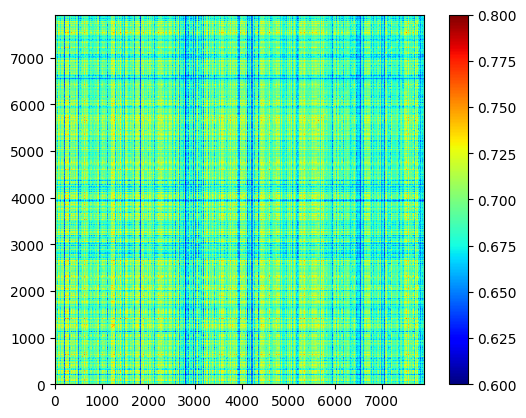

In [33]:
plt.imshow(np.corrcoef(random_story_embeddings), cmap='jet', origin='lower', vmin=0.6, vmax=0.8)
plt.colorbar()

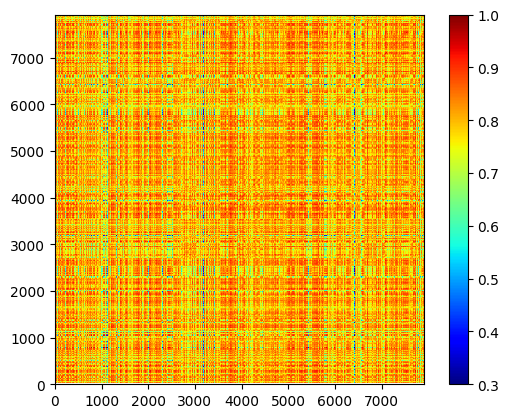

In [36]:
plt.imshow(np.corrcoef(esn_states['VIS'][critical]), cmap='jet', origin='lower', vmin=0.3, vmax=1)
plt.colorbar()

In [39]:
esn_states['VIS'].keys()

dict_keys([0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0])

/home/ijackson/dynamics/dynamics/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ijackson/dynamics/dynamics/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


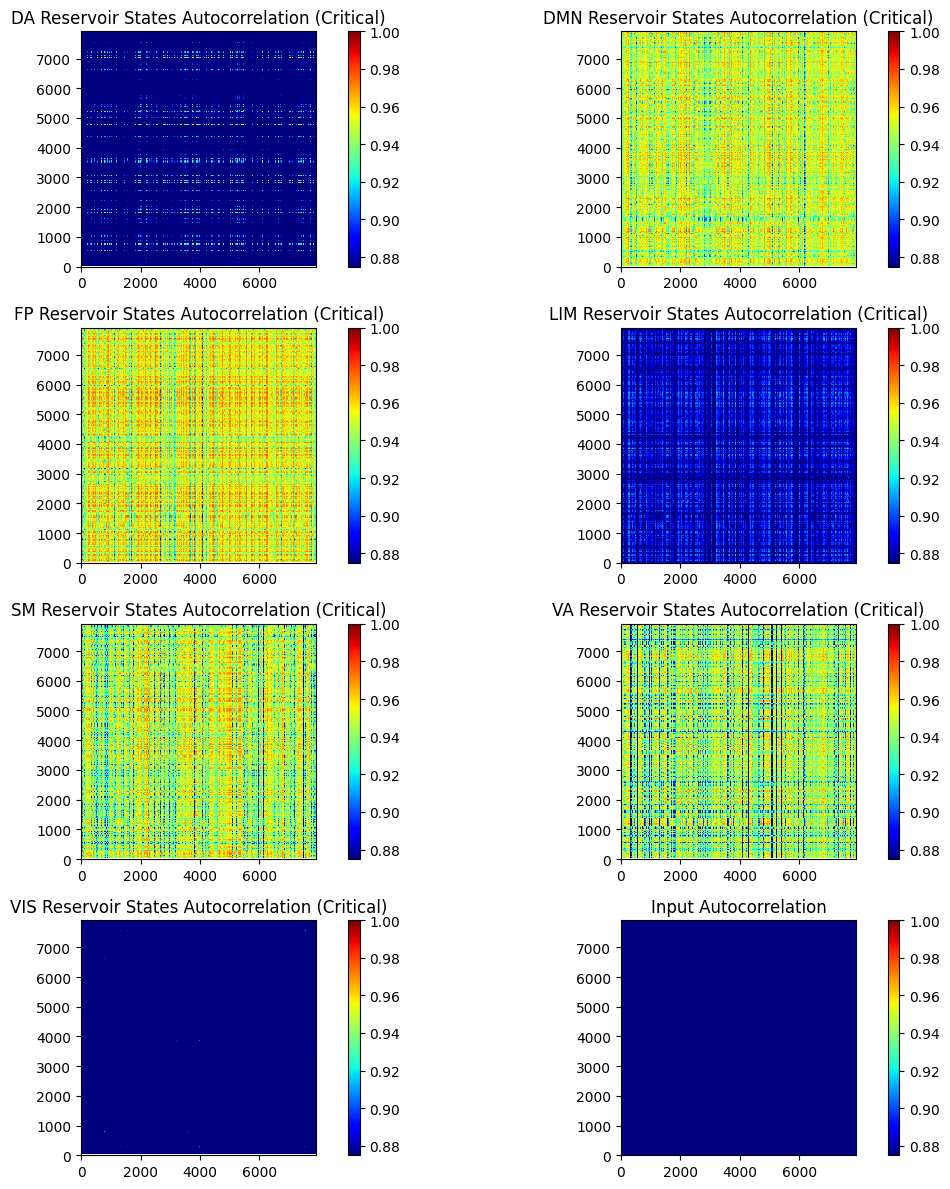

In [40]:
# let's look at the autocorrelation of the states from each output network
# average the alphas into thirds\
import matplotlib.pyplot as plt

critical = 1.0 
stable = 0.4
chaotic = 1.5

plt.figure(figsize=(12, 12))

for i, network in enumerate(esn_states):
    plt.subplot(4,2,i+1)
    plt.imshow(np.corrcoef(esn_states[network][stable]), cmap='jet', origin='lower', vmin=0.875, vmax=1)
    plt.colorbar()
    plt.title(network + ' Reservoir States Autocorrelation (Critical)')

# plot also the autocorr of the input
plt.subplot(4,2,8)
plt.imshow(np.corrcoef(random_story_embeddings), cmap='jet', origin='lower', vmin=0.875, vmax=1)
plt.colorbar()
plt.title('Input Autocorrelation')

plt.tight_layout()
plt.show()

In [ ]:
# now save the states to pkl
import pickle
states_dir = 'data/whole_connectome_states/'
for story_embedding in story_embeddings:
    story_name = story_embeddings[rand_index].split('/')[-1]
    with open(f'esn_states_{story_name}.pkl', 'wb') as f:
        pickle.dump(esn_states, f)

